In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

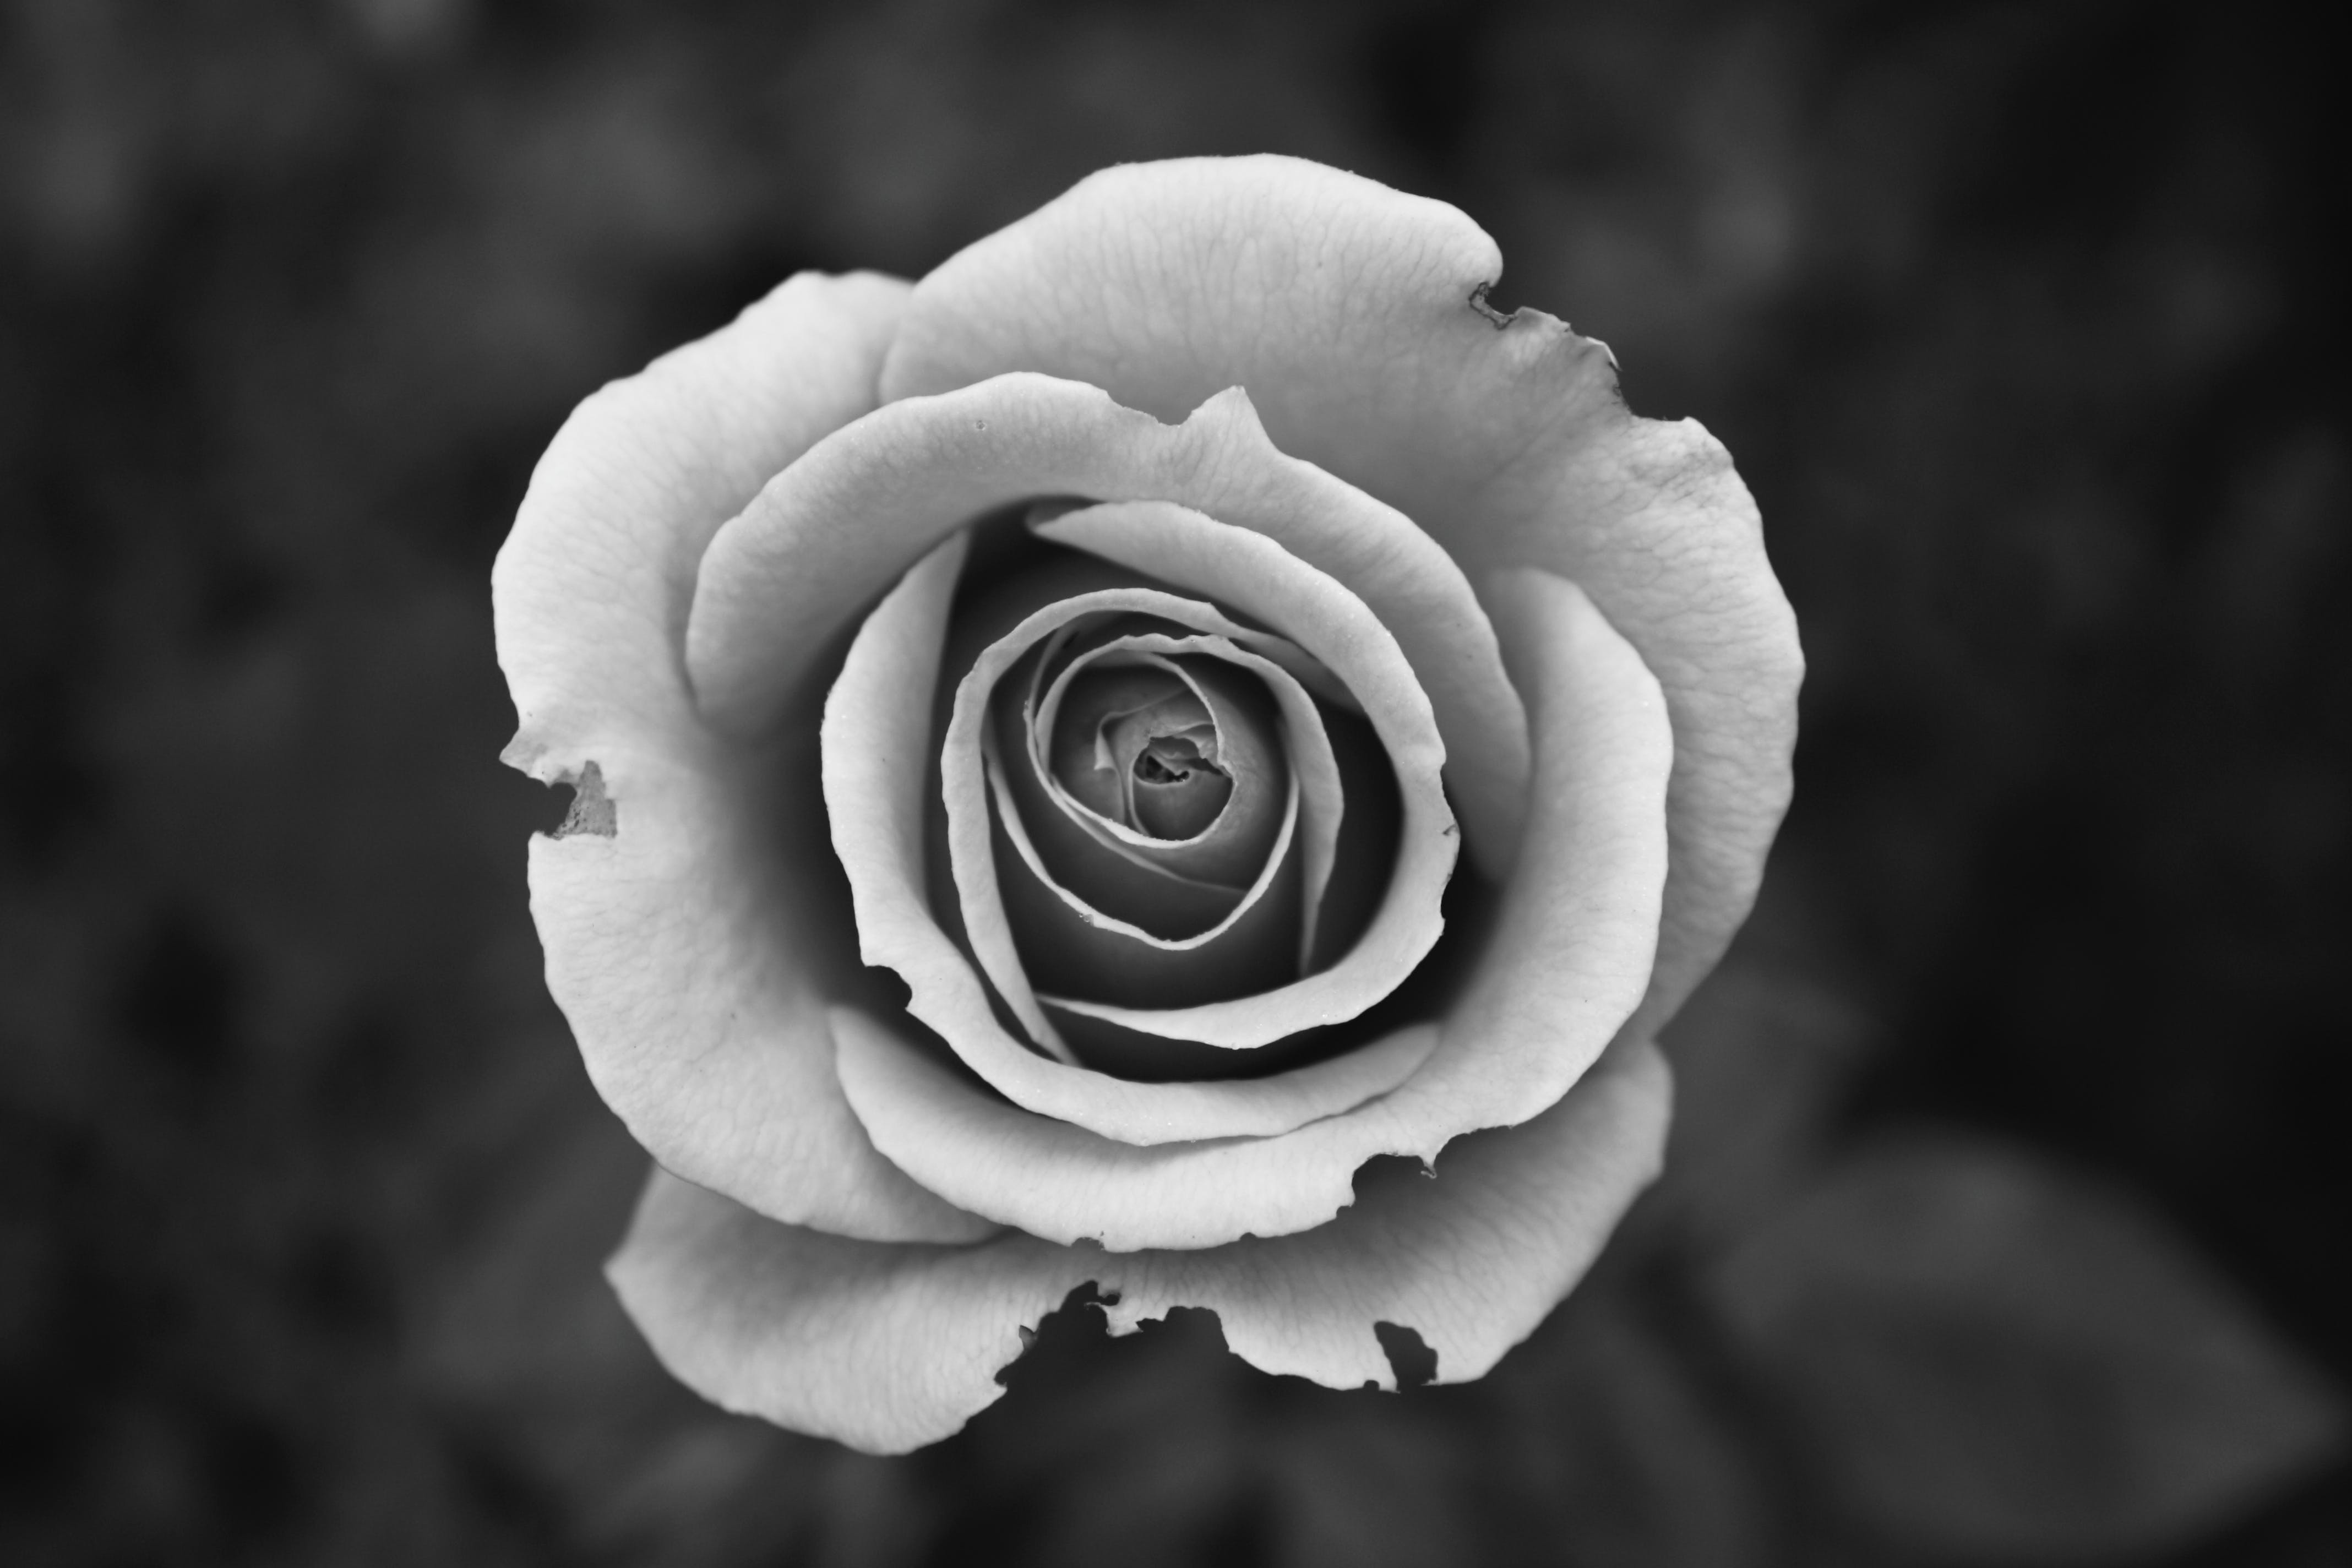

In [2]:
im = Image.open("C:\\Users\\RimJhim\\Desktop\\pr_image.jpg")
px = im.load()
im #im is the image object, and px is a pixel access object that allows you to work with the pixel values of the image.

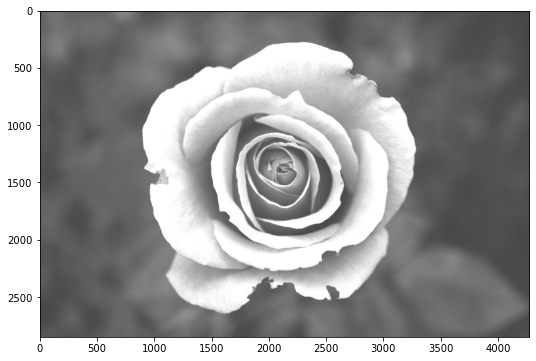

In [3]:
# arr = np.array(im)
img_array = np.array(im, dtype=int)  # Convert to int data type

# Define the value to add
value_to_add = 60

# Add the value to each pixel in the array
modified_img_array = img_array + value_to_add

# Clip to the valid range [0, 255]
arr = np.clip(modified_img_array, 0, 255)

# Display or save the modified array
# print(arr)
image = Image.fromarray(arr.reshape(im.size[1], im.size[0], len(im.getbands())).astype('uint8'))
plt.figure(figsize=(10, 6))

# Original image

plt.imshow(image)

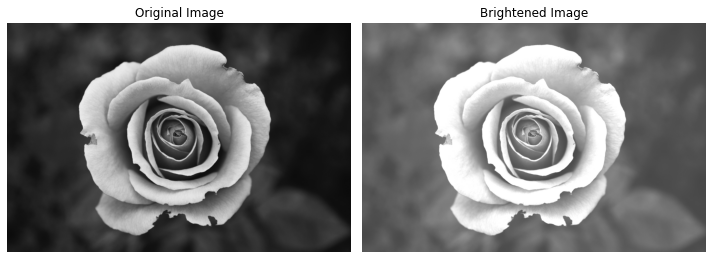

In [4]:
# Create Image objects from arrays
# bw_image = Image.fromarray(img_array)
# brightened_bw = Image.fromarray(arr)
plt.figure(figsize=(10, 30))
# Plot the images side by side
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Brightened Image')

plt.tight_layout()
plt.show()

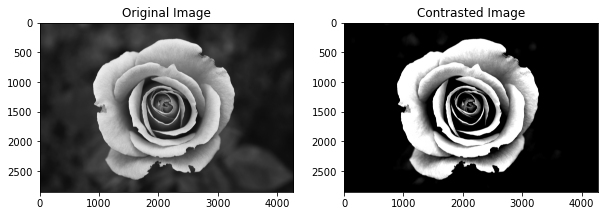

In [5]:
# Define the value to add
contrast_factor = 60

# Add the value to each pixel in the array
modified_img_array = img_array*contrast_factor

# Clip to the valid range [0, 255]
# arr = np.clip(modified_img_array, 0, 255)

# Adjust contrast (example: increase contrast by a factor of 1.5)
contrast_factor = 1.5
adjusted_array = 128 + 0.5 * (img_array - 128) + contrast_factor * (img_array - 128)

# Clip values to valid range (0 to 255)
adjusted_array = np.clip(adjusted_array, 0, 255).astype(np.uint8)

# Convert the array back to an image
adjusted_image = Image.fromarray(adjusted_array.reshape(im.size[1], im.size[0], len(im.getbands())).astype('uint8'))
image = Image.fromarray(arr.reshape(im.size[1], im.size[0], len(im.getbands())).astype('uint8'))

# Display the original and adjusted images
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adjusted_image)
plt.title('Contrasted Image')

plt.show()



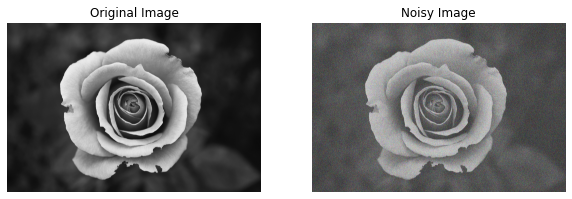

In [6]:
# Specify the mean and standard deviation for the Gaussian noise
mean = 10
std_dev = 150

# Generate Gaussian noise
noise = np.random.normal(mean, std_dev, img_array.shape)

# Add the noise to the image array
noisy_image_array = np.clip(img_array + noise, 0, 255).astype(np.uint8)

# Create a new image from the noisy image array
noisy_image = Image.fromarray(noisy_image_array)

# Display the original and noisy images using plt.imshow
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')

# Noisy Image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

plt.show()


In [7]:
noisy_image.size


(4272, 2848)

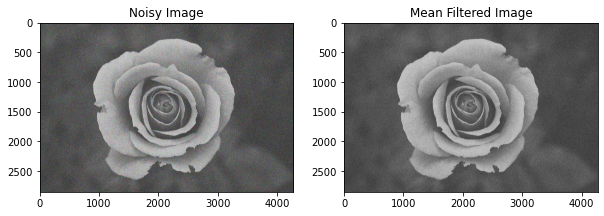

In [8]:
def mean_filter(image, kernel_size):
    # Define a kernel with all values equal to 1 divided by kernel size
#     kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    
    # Apply the filter without padding
    filtered_image = np.zeros_like(image, dtype=float)
    
    padding = kernel_size // 2
    
    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            # Define the region of interest
            roi = image[i - padding: i + padding + 1, j - padding: j + padding + 1]
            
            # Compute the filtered value using np.mean
            filtered_image[i, j] = (np.mean(roi))
    
    return filtered_image.astype(np.uint8)
# return filtered_image.astype(np.uint8)
# Generate a random image for demonstration
# image = np.random.randint(0, 256, size=(256, 256), dtype=np.uint8)
# Generate a 5x5 array with random integers between 1 and 10
# image = np.random.randint(1, 11, size=(5, 5))
image = noisy_image_array
# print( image)


# Apply mean filtering with a kernel size of 5x5
filtered_image = mean_filter(image, 3)
# Preserve the edges of the image by copying them from the original image
filtered_image[:1,:] = image[:1,:]
filtered_image[-1:,:] = image[-1:,:]
filtered_image[:,:1] = image[:,:1]
filtered_image[:,-1:] = image[:,-1:]
# print(filtered_image)
# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Mean Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()


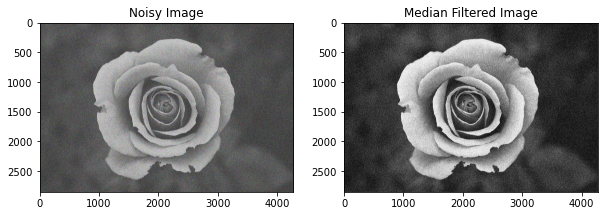

In [14]:
def mean_filter(image, kernel_size):
    # Define a kernel with all values equal to 1 divided by kernel size
#     kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    
    # Apply the filter without padding
    filtered_image = np.zeros_like(image, dtype=float)
    
    padding = kernel_size // 2
    
    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            # Define the region of interest
            roi = image[i - padding: i + padding + 1, j - padding: j + padding + 1]
            
            # Compute the filtered value using np.mean
            filtered_image[i, j] = (np.median(roi))
    
    return filtered_image.astype(np.uint8)
# return filtered_image.astype(np.uint8)
# Generate a random image for demonstration
# image = np.random.randint(0, 256, size=(256, 256), dtype=np.uint8)
# Generate a 5x5 array with random integers between 1 and 10
# image = np.random.randint(1, 11, size=(5, 5))
image = noisy_image_array
# print( image)


# Apply mean filtering with a kernel size of 5x5
filtered_image = mean_filter(image, 3)
# Preserve the edges of the image by copying them from the original image
filtered_image[:1,:] = image[:1,:]
filtered_image[-1:,:] = image[-1:,:]
filtered_image[:,:1] = image[:,:1]
filtered_image[:,-1:] = image[:,-1:]
# print(filtered_image)
# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Median Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()


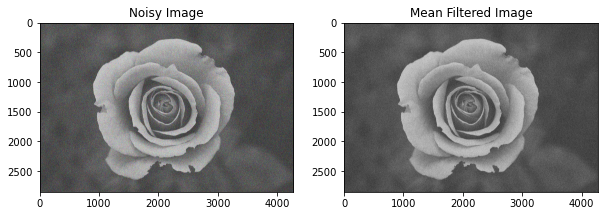

In [15]:
def mean_filter(image, kernel_size):
    # Define a kernel with all values equal to 1 divided by kernel size
#     kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    
    # Apply the filter without padding
    filtered_image = np.zeros_like(image, dtype=float)
    
    padding = kernel_size // 2
    
    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            # Define the region of interest
            roi = image[i - padding: i + padding + 1, j - padding: j + padding + 1]
            
            # Compute the filtered value using np.mean
            filtered_image[i, j] = (np.mean(roi))
    
    return filtered_image.astype(np.uint8)
# return filtered_image.astype(np.uint8)
# Generate a random image for demonstration
# image = np.random.randint(0, 256, size=(256, 256), dtype=np.uint8)
# Generate a 5x5 array with random integers between 1 and 10
# image = np.random.randint(1, 11, size=(5, 5))
image = noisy_image_array
# print( image)


# Apply mean filtering with a kernel size of 5x5
filtered_image = mean_filter(image, 5)
# Preserve the edges of the image by copying them from the original image
filtered_image[:1,:] = image[:1,:]
filtered_image[-1:,:] = image[-1:,:]
filtered_image[:,:1] = image[:,:1]
filtered_image[:,-1:] = image[:,-1:]
# print(filtered_image)
# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Mean Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()


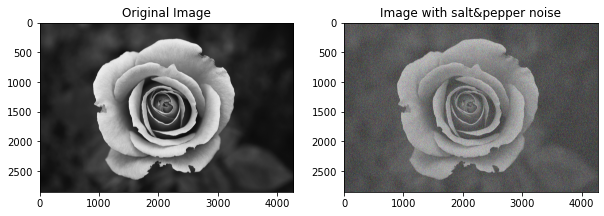

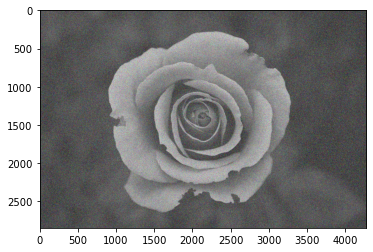

In [35]:
def add_salt_and_pepper_noise(image, distortion):
    # Convert image to NumPy array
    im_array = np.array(image)
    
    # Add salt and pepper noise to the image array
    num_pixels = int(im_array.size * distortion)
    indices = np.random.choice(im_array.size, num_pixels, replace=False)
    im_array.flat[indices[:num_pixels // 2]] = 255  # Salt noise
    im_array.flat[indices[num_pixels // 2:]] = 0    # Pepper noise
    
    # Convert modified array back to PIL Image
    noisy_image = Image.fromarray(im_array)
    
    return noisy_image


# Example usage:
# Load your image using any image processing library such as OpenCV or PIL
# For demonstration purposes, let's generate a random 5x5 grayscale image
# image = np.random.randint(1, 11, size=(5, 5))
image = im
distortion = 0.5  # 30% distortion
saltnoisy_image = add_salt_and_pepper_noise(image, distortion)
# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.title('Image with salt&pepper noise')
plt.imshow(saltnoisy_image, cmap='gray')
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.show()
plt.imshow(saltnoisy_image)

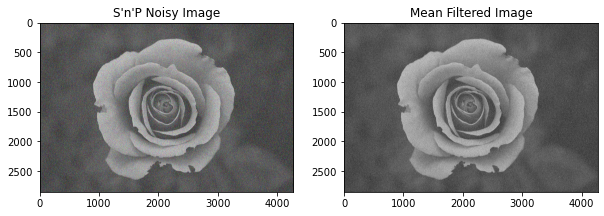

In [36]:
def mean_filter(image, kernel_size):
    # Define a kernel with all values equal to 1 divided by kernel size
#     kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    
    # Apply the filter without padding
    filtered_image = np.zeros_like(image, dtype=float)
    
    padding = kernel_size // 2
    
    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            # Define the region of interest
            roi = image[i - padding: i + padding + 1, j - padding: j + padding + 1]
            
            # Compute the filtered value using np.mean
            filtered_image[i, j] = (np.mean(roi))
    
    return filtered_image.astype(np.uint8)
# return filtered_image.astype(np.uint8)
# Generate a random image for demonstration
# image = np.random.randint(0, 256, size=(256, 256), dtype=np.uint8)
# Generate a 5x5 array with random integers between 1 and 10
# image = np.random.randint(1, 11, size=(5, 5))
image = np.array(saltnoisy_image)
# print( image)


# Apply mean filtering with a kernel size of 5x5
filtered_image = mean_filter(image, 5)
# Preserve the edges of the image by copying them from the original image
filtered_image[:1,:] = image[:1,:]
filtered_image[-1:,:] = image[-1:,:]
filtered_image[:,:1] = image[:,:1]
filtered_image[:,-1:] = image[:,-1:]
# print(filtered_image)
# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('S\'n\'P Noisy Image')
plt.imshow(saltnoisy_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Mean Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()


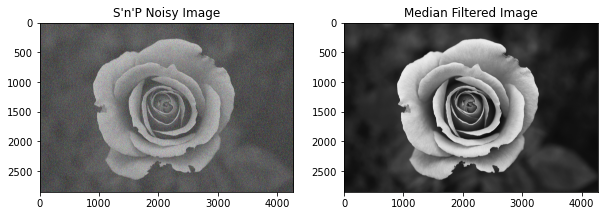

In [37]:
def median_filter(image, kernel_size):
    # Define a kernel with all values equal to 1 divided by kernel size
#     kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    
    # Apply the filter without padding
    filtered_image = np.zeros_like(image, dtype=float)
    
    padding = kernel_size // 2
    
    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            # Define the region of interest
            roi = image[i - padding: i + padding + 1, j - padding: j + padding + 1]
            
            # Compute the filtered value using np.mean
            filtered_image[i, j] = (np.median(roi))
    
    return filtered_image.astype(np.uint8)
# return filtered_image.astype(np.uint8)
# Generate a random image for demonstration
# image = np.random.randint(0, 256, size=(256, 256), dtype=np.uint8)
# Generate a 5x5 array with random integers between 1 and 10
# image = np.random.randint(1, 11, size=(5, 5))
image = np.array(saltnoisy_image)
# print( image)


# Apply mean filtering with a kernel size of 5x5
filtered_image = median_filter(image, 5)
# Preserve the edges of the image by copying them from the original image
filtered_image[:1,:] = image[:1,:]
filtered_image[-1:,:] = image[-1:,:]
filtered_image[:,:1] = image[:,:1]
filtered_image[:,-1:] = image[:,-1:]
# print(filtered_image)
# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('S\'n\'P Noisy Image')
plt.imshow(saltnoisy_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Median Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()


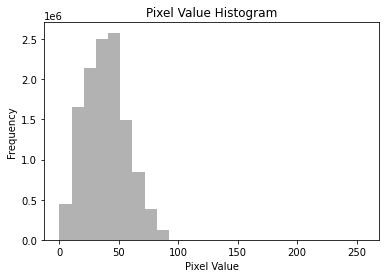

In [40]:
def plot_histogram(image):
    # Convert image to grayscale if it's in color
    if len(np.array(image).shape) == 3:
        # Take the mean of RGB channels to convert to grayscale
        image = np.mean(image, axis=2, dtype=np.uint8)
    
    # Flatten the image to a 1D array
    pixels = image.flatten()
    
    # Plot histogram
    plt.hist(pixels, bins=25, range=(0, 256), color='gray', alpha=0.6)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Pixel Value Histogram')
    plt.show()

# Example usage:
# Assuming 'image' is your original image (e.g., a NumPy array or PIL Image object)
# Load your image using OpenCV or PIL

# Display the histogram
plot_histogram(im)


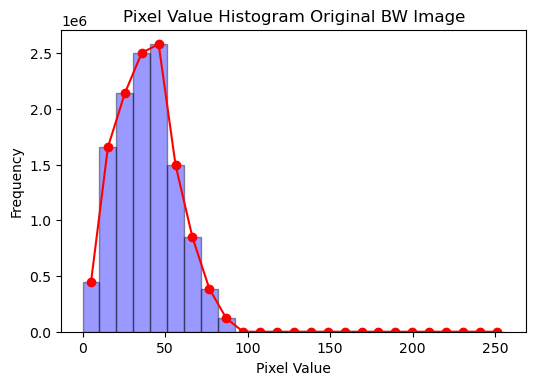

In [51]:
def plot_histogram_with_polygon(image):
    # Convert image to grayscale if it's in color
    if len(np.array(image).shape) == 3:
        # Take the mean of RGB channels to convert to grayscale
        image = np.mean(image, axis=2, dtype=np.uint8)
    
    # Flatten the image to a 1D array
    pixels = image.flatten()
    
    # Plot histogram
#     light_purple_hex = '#D8BFD8'
    fig, ax = plt.subplots(figsize=(6, 4), dpi=100)  # Adjust size and DPI here
    plt.hist(pixels, bins=25, range=(0, 256), color='blue', alpha=0.4,edgecolor='black')

    # Calculate histogram data
    counts, bins = np.histogram(pixels, bins=25, range=(0, 256))
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Plot frequency polygon
    plt.plot(bin_centers, counts, color='red', marker='o', linestyle='-')

    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Pixel Value Histogram Original BW Image')
    plt.show()

# Example usage:
# Assuming 'image' is your original image (e.g., a NumPy array or PIL Image object)
# Load your image using OpenCV or PIL

# Display the histogram with the frequency polygon
plot_histogram_with_polygon(im)
